tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [4, 0, 0,  ..., 0, 0, 0],
        [3, 4, 0,  ..., 0, 0, 3]])
torch.Size([256, 256])


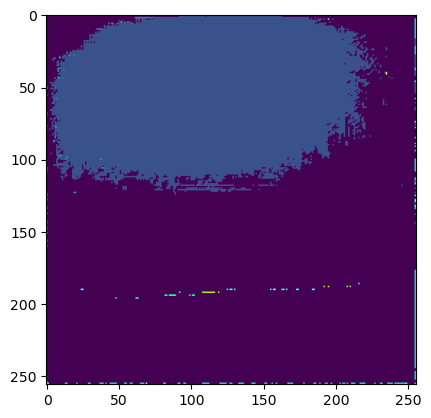

In [13]:
import gradio as gr
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torch.load("C:\\Users\\Ganipineni\\Desktop\\DL_project\\WEB-APP\\model.pt", map_location=torch.device('cpu'))
model.eval()

img_path = "C:\\Users\\Ganipineni\\Desktop\\DL_project\\DL_Dataset\\images\\train\\Img_00.jpeg"
img = Image.open(img_path)

t = transforms.Compose([
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
image = t(img)
model.to(device); image=image.to(device)
with torch.no_grad():
    image = image.unsqueeze(0)
    output = model(image)
    masked = torch.argmax(output, dim=1)
    masked = masked.cpu().squeeze(0)
    print(masked)
    print(masked.size())
    plt.imshow(masked)
    

arr = masked.cpu().numpy()
arr_ = np.squeeze(arr)
output = Image.fromarray(np.uint8(arr_))

output.show()

In [11]:
import gradio as gr
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torch.load("C:\\Users\\Ganipineni\\Desktop\\DL_project\\WEB-APP\\model.pt", map_location=torch.device('cpu'))
model.eval()

t = transforms.Compose([
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

def predict_image(img):
    try:
        image = t(img)
        model.to(device); image=image.to(device)
        with torch.no_grad():
            image = image.unsqueeze(0)
            output = model(image)['out']
            masked = torch.max(output, dim=1)
            masked = masked.cpu().squeeze().cpu().numpy()
            predicted_image =Image.fromarray(masked, mode='RGB')
            return predicted_image
    except Exception as e:
        print(e)

inputs = gr.inputs.Image()
outputs = gr.outputs.Image(type="pil")

app = gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs)
app.launch(debug=True, share= True)



C:\Users\Ganipineni\anaconda3\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Ganipineni\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Ganipineni\anaconda3\lib\site-packages\gradio\outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7869

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app


Unexpected type <class 'numpy.ndarray'>
Keyboard interruption in main thread... closing server.
